In [2]:
import pandas as pd
import random
from faker import Faker
from datetime import datetime
import os
fake = Faker()
import seaborn as sns
import matplotlib.pyplot as plt



In [3]:

categories = ['Food', 'Transportation', 'Bills','Travel','Gifts','Entertainment', 'Shopping', 'Health', 'Education', 'Utilities','Groceries']
payment_modes = ['Cash', 'Online']
months = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}

# Folder to save files
output_folder = 'monthly_expenses'
os.makedirs(output_folder, exist_ok=True)

def generate_expenses_for_month(month_name, month_num):
    num_rows = random.randint(50, 150)
    data = []
    for _ in range(num_rows):
        category = random.choice(categories)
        payment_mode = random.choice(payment_modes)
        description = fake.sentence(nb_words=4)
        amount_paid = round(random.uniform(10, 500), 2)
        cashback = round(random.uniform(0, amount_paid * 0.1), 2) if payment_mode == 'Online' else 0.0
        date = fake.date_between_dates(
            date_start=datetime(2024, month_num, 1),
            date_end=datetime(2024, month_num, 28)
        )
        data.append({
            'Date': date,
            'Category': category,
            'Payment Mode': payment_mode,
            'Description': description,
            'Amount Paid': amount_paid,
            'Cashback': cashback
        })
    df = pd.DataFrame(data)
    filename = f'{output_folder}/expenses_{month_name}.csv'
    df.to_csv(filename, index=False)
    print(f'Saved {filename}')

# Generate data for each month
for month_name, month_num in months.items():
    generate_expenses_for_month(month_name, month_num)


Saved monthly_expenses/expenses_January.csv
Saved monthly_expenses/expenses_February.csv
Saved monthly_expenses/expenses_March.csv
Saved monthly_expenses/expenses_April.csv
Saved monthly_expenses/expenses_May.csv
Saved monthly_expenses/expenses_June.csv
Saved monthly_expenses/expenses_July.csv
Saved monthly_expenses/expenses_August.csv
Saved monthly_expenses/expenses_September.csv
Saved monthly_expenses/expenses_October.csv
Saved monthly_expenses/expenses_November.csv
Saved monthly_expenses/expenses_December.csv


In [4]:

# Path to your folder with CSVs
folder_path = 'monthly_expenses'  # or the full path

# List to collect individual DataFrames
all_data = []

# Loop through each file in the folder
for file in os.listdir(folder_path):
    if file.endswith('.csv'):
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path)
        df['Month'] = file.replace('expenses_', '').replace('.csv', '')  # Add Month column
        all_data.append(df)

# Combine all months into one DataFrame
combined_df = pd.concat(all_data, ignore_index=True)

# (Optional) Save to one CSV
combined_df.to_csv('combined_expenses.csv', index=False)

# (Optional) Show first few rows
print(combined_df.head())



         Date        Category Payment Mode                       Description  \
0  2024-04-19       Utilities       Online          Boy current start later.   
1  2024-04-11          Travel       Online           Science red none about.   
2  2024-04-05       Education       Online         Look because simply time.   
3  2024-04-01   Entertainment       Online  Firm Mrs explain anyone nothing.   
4  2024-04-18  Transportation       Online              Woman boy hold loss.   

   Amount Paid  Cashback  Month  
0       172.38     16.15  April  
1       302.75      4.20  April  
2        83.53      0.80  April  
3        32.23      1.91  April  
4       485.31     20.15  April  


In [5]:
combined_df.head()

Date        Category Payment Mode                       Description  \
0  2024-04-19       Utilities       Online          Boy current start later.   
1  2024-04-11          Travel       Online           Science red none about.   
2  2024-04-05       Education       Online         Look because simply time.   
3  2024-04-01   Entertainment       Online  Firm Mrs explain anyone nothing.   
4  2024-04-18  Transportation       Online              Woman boy hold loss.   

   Amount Paid  Cashback  Month  
0       172.38     16.15  April  
1       302.75      4.20  April  
2        83.53      0.80  April  
3        32.23      1.91  April  
4       485.31     20.15  April

In [6]:
import mysql.connector
from mysql.connector import Error

In [7]:


conn_mysql = mysql.connector.connect(
    host="localhost",
    user="root",
    password="0096"
)
cursor_mysql = conn_mysql.cursor()
print("MySQL connection established!")

MySQL connection established!


In [8]:
cursor_mysql.execute("CREATE DATABASE IF NOT EXISTS expenses_db;")
print("MySQL database 'expenses_db' created successfully!")

MySQL database 'expenses_db' created successfully!


In [9]:
cursor_mysql.execute("USE expenses_db;")  # Select the database

cursor_mysql.execute("""
CREATE TABLE IF NOT EXISTS expenses (
    id INT AUTO_INCREMENT PRIMARY KEY,
    date DATE,
    category VARCHAR(50),
    payment_mode VARCHAR(20),
    description TEXT,
    amount_paid DECIMAL(10, 2),
    cashback DECIMAL(10, 2),
    month VARCHAR(20)
);
""")

conn_mysql.commit()
print("Table 'expenses' created successfully in MySQL!")


Table 'expenses' created successfully in MySQL!


In [10]:
data_list = combined_df.values.tolist()

query = """
    INSERT INTO expenses_db.expenses(date, category, payment_mode, description, amount_paid, cashback, month)
    VALUES (%s, %s, %s, %s, %s, %s, %s)
"""

cursor_mysql.executemany(query, data_list)
conn_mysql.commit()
print("Data inserted using to_list()")


Data inserted using to_list()


+----------------+-----------------+
| category       |   (amount_paid) |
+================+=================+
| Education      |          623099 |
+----------------+-----------------+
| Utilities      |          630029 |
+----------------+-----------------+
| Bills          |          589366 |
+----------------+-----------------+
| Shopping       |          607071 |
+----------------+-----------------+
| Transportation |          634112 |
+----------------+-----------------+
| Health         |          606281 |
+----------------+-----------------+
| Entertainment  |          578458 |
+----------------+-----------------+
| Food           |          605698 |
+----------------+-----------------+
| Gifts          |          417531 |
+----------------+-----------------+
| Travel         |          393673 |
+----------------+-----------------+
| Groceries      |          350633 |
+----------------+-----------------+


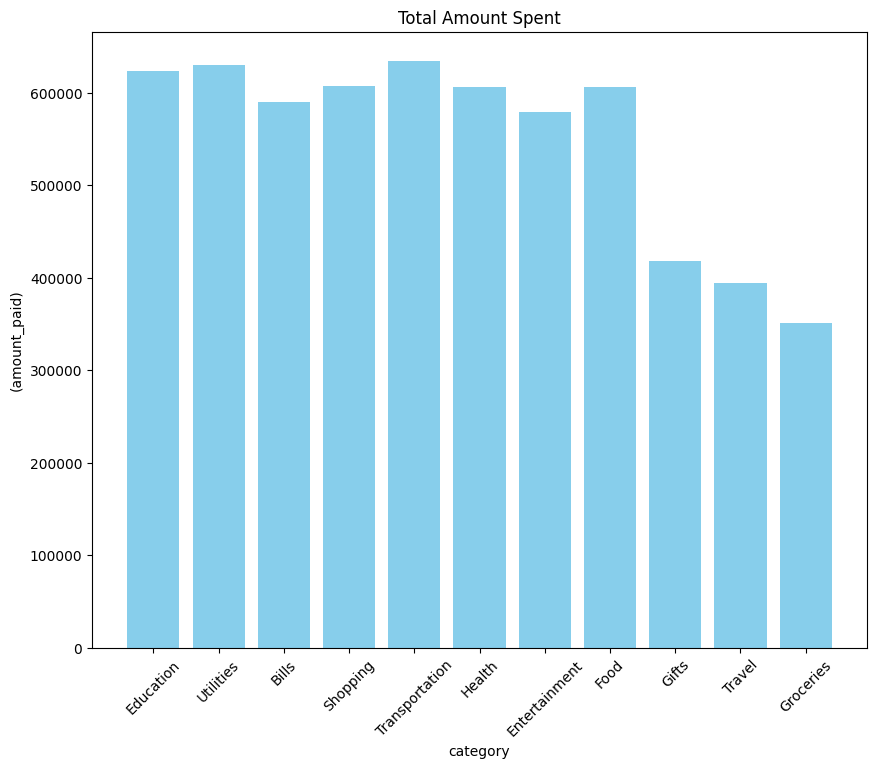

In [11]:
from tabulate import tabulate
# 1 What is the total amount spent in each category?

query1 = "SELECT category, sum(amount_paid) AS total_spent FROM expenses_db.expenses GROUP BY category ;"
cursor_mysql.execute(query1)
result1 = cursor_mysql.fetchall()

# Define table headers
headers = ["category", "(amount_paid)"]

# Print the result as a table
print(tabulate(result1, headers=headers, tablefmt="grid"))

df1 = pd.DataFrame(result1, columns=headers)

plt.figure(figsize=(10, 8))
plt.bar(df1['category'], df1['(amount_paid)'], color='skyblue')
plt.title('Total Amount Spent')
plt.xlabel('category')
plt.ylabel('(amount_paid)')
plt.xticks(rotation=45)
plt.show()

+----------------+---------------+
| payment_mode   |   amount_paid |
+================+===============+
| Online         |   2.981e+06   |
+----------------+---------------+
| Cash           |   3.05495e+06 |
+----------------+---------------+


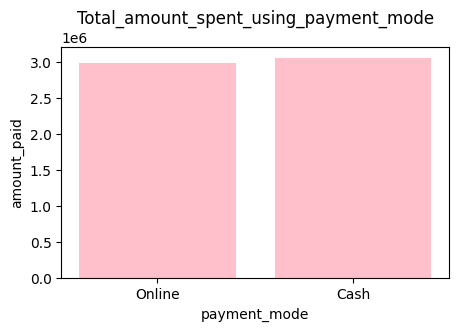

In [12]:
# 2 What is the total amount spent using each payment mode?
query2 = "SELECT payment_mode, sum(amount_paid) AS total_spent FROM expenses_db.expenses GROUP BY payment_mode ;"
cursor_mysql.execute(query2)
result2 = cursor_mysql.fetchall()

# Define table headers
headers = ["payment_mode", "amount_paid"]

# Print the result as a table
print(tabulate(result2, headers=headers, tablefmt="grid"))

# save dtaframe(data)
df2 = pd.DataFrame(result2, columns=headers)

# visualization
plt.figure(figsize=(5, 3))
plt.bar(df2['payment_mode'], df2['amount_paid'], color='pink')
plt.title('Total_amount_spent_using_payment_mode')
plt.xlabel('payment_mode')
plt.ylabel('amount_paid')
plt.show()



In [13]:
# 3 What is the total cashback received across all transactions?
query3 = "SELECT sum(cashback) AS total_cashback FROM expenses_db.expenses;"
cursor_mysql.execute(query3)
result3 = cursor_mysql.fetchall()

# Define table headers
headers = ["cashback"]

# Print the result as a table
print(tabulate(result3, headers=headers, tablefmt="grid"))

# save dtaframe(data)
df3 = pd.DataFrame(result3, columns=headers)




+------------+
|   cashback |
+============+
|     147981 |
+------------+


+----------------+--------------------------------+
| category       |   most_five_expensive_category |
+================+================================+
| Transportation |                         634112 |
+----------------+--------------------------------+
| Utilities      |                         630029 |
+----------------+--------------------------------+
| Education      |                         623099 |
+----------------+--------------------------------+
| Shopping       |                         607071 |
+----------------+--------------------------------+
| Health         |                         606281 |
+----------------+--------------------------------+


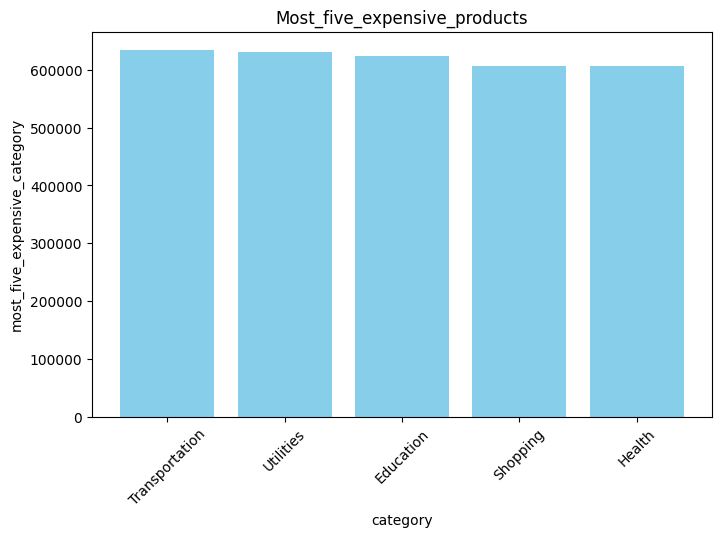

In [14]:
# 4  Which are the top 5 most expensive categories in terms of spending?


query4 = "SELECT category , sum(amount_paid) AS total_spent FROM expenses_db.expenses GROUP BY category ORDER BY total_spent DESC LIMIT 5;"
cursor_mysql.execute(query4)
result4 = cursor_mysql.fetchall()

# Define table headers
headers = ["category","most_five_expensive_category"]

# Print the result as a table
print(tabulate(result4, headers=headers, tablefmt="grid"))

# save dtaframe(data)
df4 = pd.DataFrame(result4, columns=headers)

# visualization
plt.figure(figsize=(8, 5))
plt.bar(df4['category'], df4['most_five_expensive_category'], color='skyblue')
plt.title('Most_five_expensive_products')
plt.xlabel('category')
plt.ylabel('most_five_expensive_category')
plt.xticks(rotation=45)
plt.show()

+----------------+---------------+
| payment_mode   |   amount_paid |
+================+===============+
| Cash           |        327592 |
+----------------+---------------+
| Online         |        306520 |
+----------------+---------------+


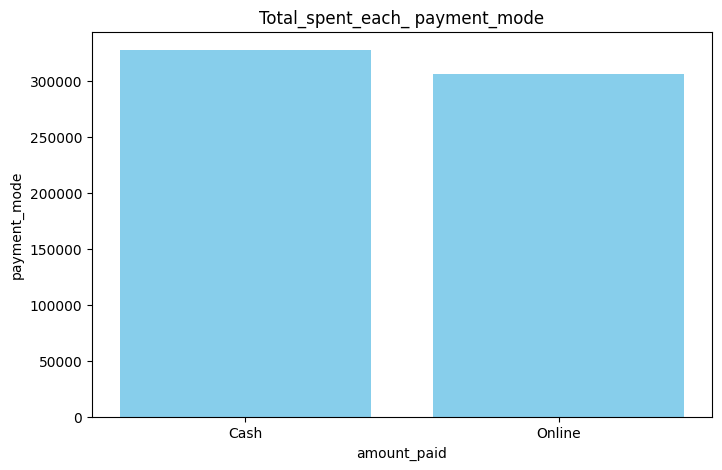

In [15]:
# 5 How much was spent on transportation using different payment modes?

query5 = "SELECT payment_mode, sum(amount_paid) AS total_spent FROM expenses_db.expenses WHERE category ='transportation' GROUP BY payment_mode;"
cursor_mysql.execute(query5)
result5 = cursor_mysql.fetchall()

# Define table headers
headers = ["payment_mode","amount_paid"]

# Print the result as a table
print(tabulate(result5, headers=headers, tablefmt="grid"))

# save dtaframe(data)
df5 = pd.DataFrame(result5, columns=headers)

# visualization
plt.figure(figsize=(8, 5))
plt.bar(df5['payment_mode'], df5['amount_paid'], color='skyblue')
plt.title('Total_spent_each_ payment_mode')
plt.xlabel('amount_paid')
plt.ylabel('payment_mode')
plt.show()


+--------+------------+----------------+----------------+-----------------------------------------------------+---------------+------------+-----------+
|   idno | Date       | category       | payment_mode   | Description                                         |   amount_paid |   cashback | month     |
+========+============+================+================+=====================================================+===============+============+===========+
|      1 | 2024-04-16 | Education      | Online         | Street letter create pretty maintain.               |         24.8  |       2.16 | April     |
+--------+------------+----------------+----------------+-----------------------------------------------------+---------------+------------+-----------+
|      3 | 2024-04-18 | Bills          | Online         | On choice official.                                 |        253.84 |      10.83 | April     |
+--------+------------+----------------+----------------+-------------------------

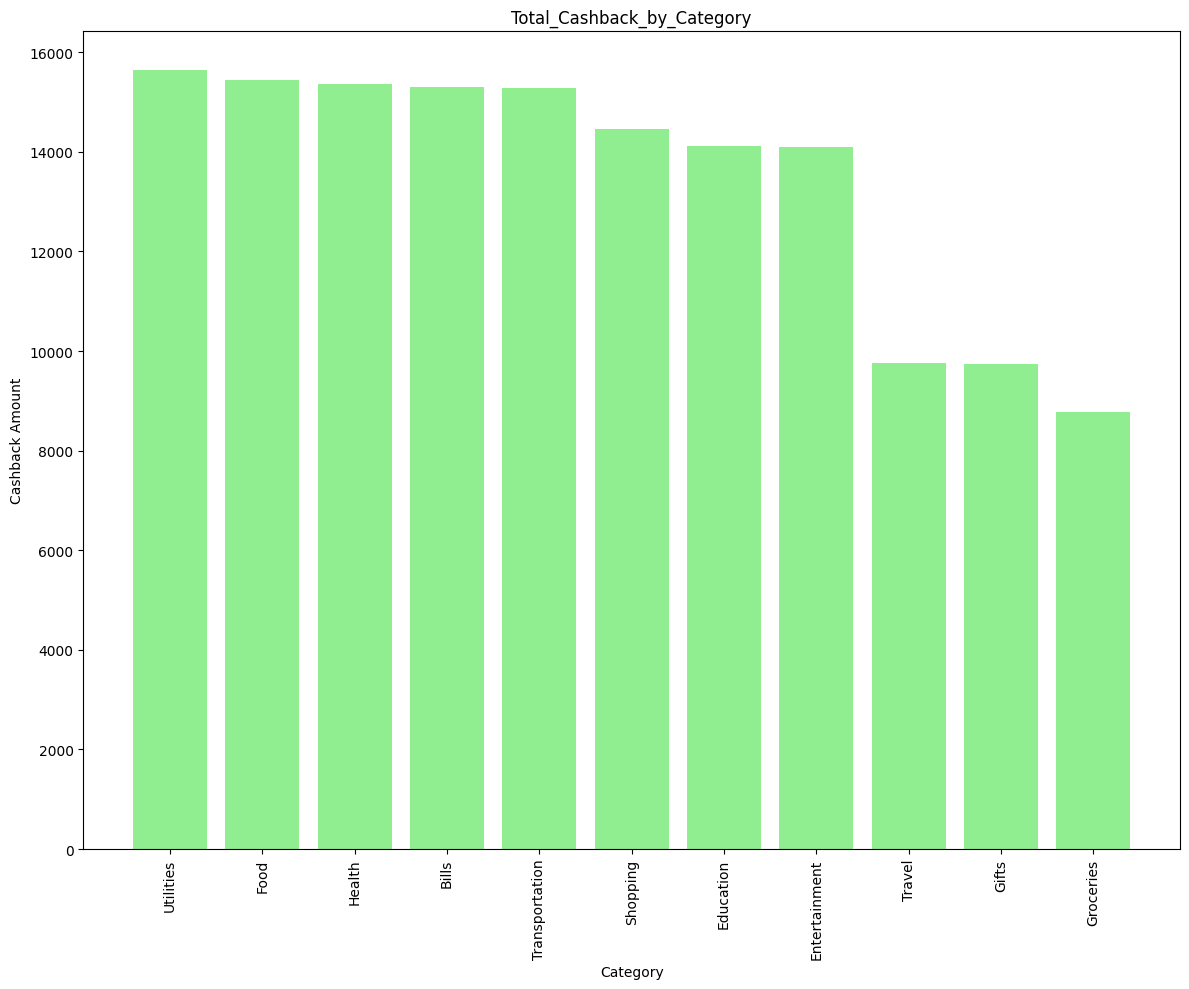

In [16]:
# 6 Which transactions resulted in cashback

query6 = "SELECT *  FROM expenses_db.expenses WHERE cashback ;"
cursor_mysql.execute(query6)
result6 = cursor_mysql.fetchall()

# Define table headers
headers = ["idno","Date", "category","payment_mode","Description","amount_paid","cashback","month"]

# Print the result as a table
print(tabulate(result6, headers=headers, tablefmt="grid"))

# save dtaframe(data)
df6 = pd.DataFrame(result6, columns=headers)

# visualization
cashback_by_category = df6.groupby('category')['cashback'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 10))
plt.bar(cashback_by_category.index, cashback_by_category.values, color='lightgreen')
plt.title('Total_Cashback_by_Category')
plt.ylabel('Cashback Amount')
plt.xlabel('Category')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

+-----------+--------------------------+
| Month     |   Total_spent_each_month |
+===========+==========================+
| April     |                   506562 |
+-----------+--------------------------+
| August    |                   486298 |
+-----------+--------------------------+
| December  |                   520852 |
+-----------+--------------------------+
| February  |                   484009 |
+-----------+--------------------------+
| January   |                   567490 |
+-----------+--------------------------+
| July      |                   510903 |
+-----------+--------------------------+
| June      |                   493029 |
+-----------+--------------------------+
| March     |                   555387 |
+-----------+--------------------------+
| May       |                   477774 |
+-----------+--------------------------+
| November  |                   492655 |
+-----------+--------------------------+
| October   |                   478568 |
+-----------+---

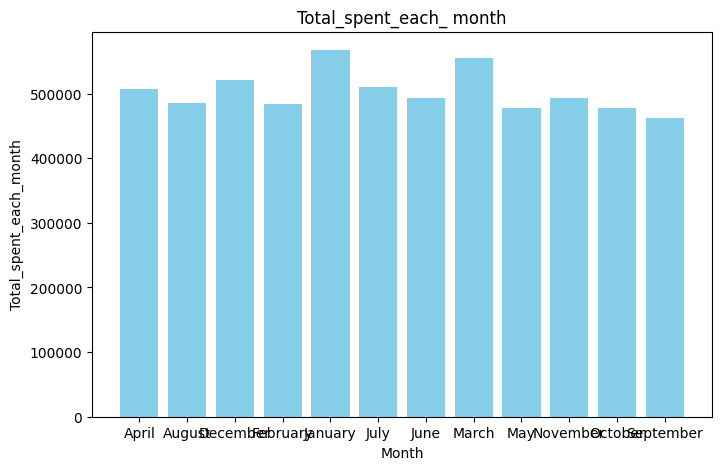

In [17]:
# 7 What is the total spending in each month of the year?

query7 = "SELECT month, sum(amount_paid) AS total_spent_month FROM expenses_db.expenses GROUP BY month;"
cursor_mysql.execute(query7)
result7 = cursor_mysql.fetchall()

# Define table headers
headers = ["Month","Total_spent_each_month"]

# Print the result as a table
print(tabulate(result7, headers=headers, tablefmt="grid"))

# save dtaframe(data)
df7 = pd.DataFrame(result7, columns=headers)

# visualization
plt.figure(figsize=(8, 5))
plt.bar(df7['Month'], df7['Total_spent_each_month'], color='skyblue')
plt.title('Total_spent_each_ month')
plt.xlabel('Month')
plt.ylabel('Total_spent_each_month')
plt.show()

+-----------+---------------+--------------------------+
| Month     | Category      |   Total_spent_each_month |
+===========+===============+==========================+
| March     | Entertainment |                  61569.4 |
+-----------+---------------+--------------------------+
| January   | Entertainment |                  56512   |
+-----------+---------------+--------------------------+
| May       | Entertainment |                  53206.4 |
+-----------+---------------+--------------------------+
| July      | Entertainment |                  52268   |
+-----------+---------------+--------------------------+
| December  | Entertainment |                  51742.7 |
+-----------+---------------+--------------------------+
| April     | Entertainment |                  48899.8 |
+-----------+---------------+--------------------------+
| November  | Entertainment |                  48622   |
+-----------+---------------+--------------------------+
| June      | Entertainment |  

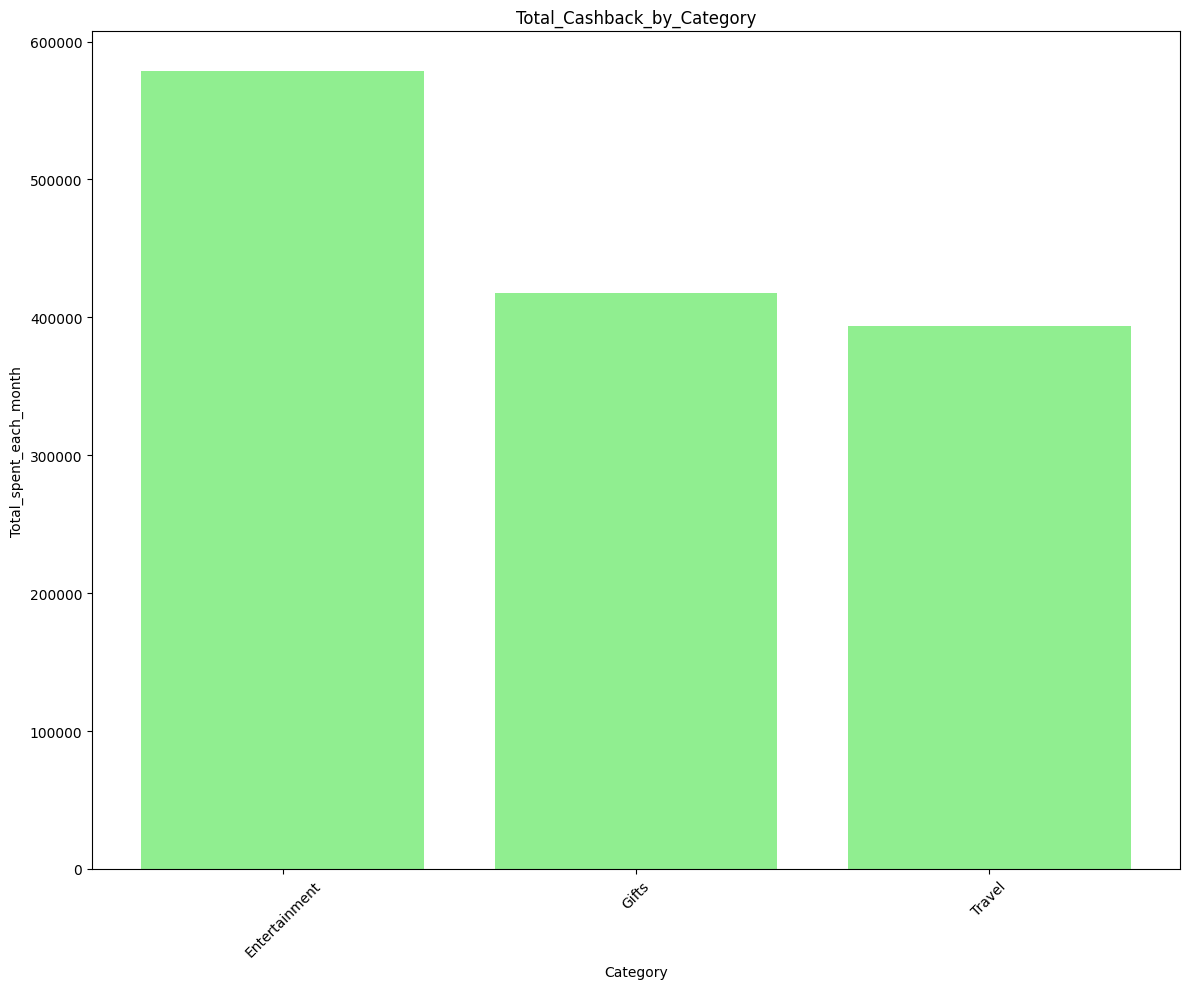

In [18]:
# 8 Which months have the highest spending in categories like "Travel," "Entertainment," or "Gifts"?

query8 = "SELECT Month,Category, sum(amount_paid) AS total_spent FROM expenses_db.expenses WHERE Category IN ('Travel','Entertainment','Gifts') GROUP BY MONTH,Category ORDER BY total_spent DESC;"
cursor_mysql.execute(query8)
result8 = cursor_mysql.fetchall()

# Define table headers
headers = [ "Month","Category", "Total_spent_each_month"]

# Print the result as a table
print(tabulate(result8, headers=headers, tablefmt="grid"))

# save dtaframe(data)
df8 = pd.DataFrame(result8, columns=headers)

month_by_category = df8.groupby('Category')['Total_spent_each_month'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 10))
plt.bar(month_by_category.index, month_by_category.values, color='lightgreen')
plt.title('Total_Cashback_by_Category')
plt.ylabel('Total_spent_each_month')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

+---------------------------------------------------+-----------+------------------+---------------+
| description                                       | Month     |   Times_in_month |   total_spent |
+===================================================+===========+==================+===============+
| Blood newspaper any.                              | July      |                2 |        999.26 |
+---------------------------------------------------+-----------+------------------+---------------+
| Remain forget change.                             | February  |                2 |        997.84 |
+---------------------------------------------------+-----------+------------------+---------------+
| International power upon.                         | March     |                2 |        995.22 |
+---------------------------------------------------+-----------+------------------+---------------+
| Guess throughout loss course.                     | August    |                2 |       

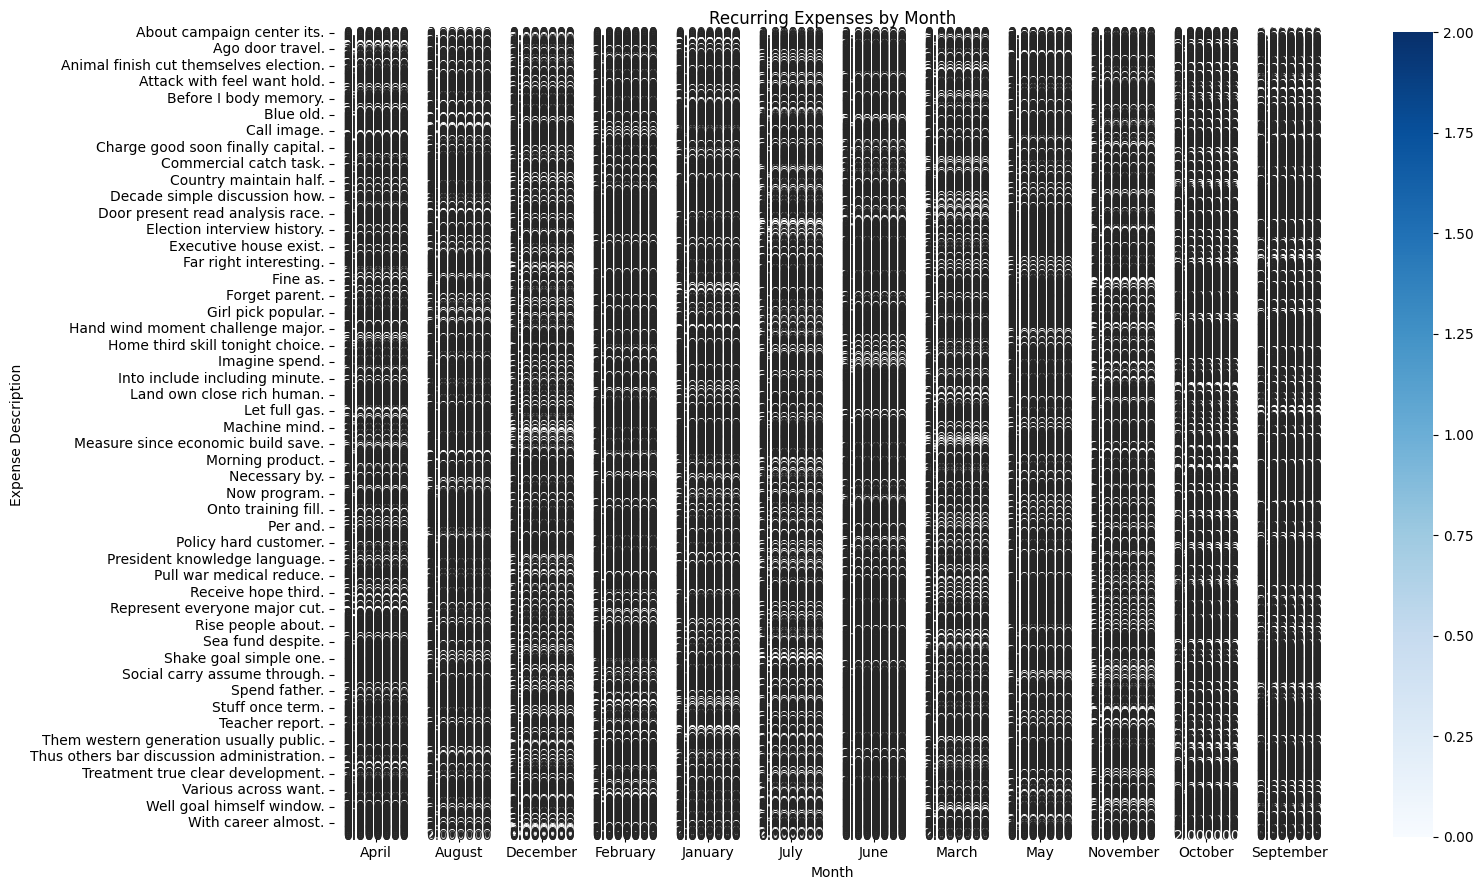

In [19]:
# 9 Are there any recurring expenses that occur during specific months of the year

query9 = " SELECT description,month,COUNT(*) AS times_in_month, SUM(amount_paid) AS total_spent FROM expenses_db.expenses GROUP BY description,month HAVING times_in_month >= 2 ORDER BY times_in_month DESC, total_spent DESC ;"
cursor_mysql.execute(query9)
result9 = cursor_mysql.fetchall()

# Define table headers
headers = ["description", "Month", "Times_in_month","total_spent"]

# Print the result as a table
print(tabulate(result9, headers=headers, tablefmt="grid"))

# save dtaframe(data)
df9 = pd.DataFrame(result9, columns=headers)

pivot_recurring = df9.pivot_table(index='description', columns='Month', values='Times_in_month', fill_value=0)

plt.figure(figsize=(16, 9))
sns.heatmap(pivot_recurring, cmap="Blues", annot=True, fmt='f', linewidths=1.5)
plt.title("Recurring Expenses by Month")
plt.ylabel("Expense Description")
plt.xlabel("Month")
plt.tight_layout()
plt.show()


+-----------+-------------------------------+
| Month     |   total_spent_erened_cashback |
+===========+===============================+
| April     |                       12113.1 |
+-----------+-------------------------------+
| August    |                       11153.1 |
+-----------+-------------------------------+
| December  |                       12286.3 |
+-----------+-------------------------------+
| February  |                       11984.6 |
+-----------+-------------------------------+
| January   |                       14356.3 |
+-----------+-------------------------------+
| July      |                       13026.1 |
+-----------+-------------------------------+
| June      |                       12277.1 |
+-----------+-------------------------------+
| March     |                       13774.1 |
+-----------+-------------------------------+
| May       |                       11932.4 |
+-----------+-------------------------------+
| November  |                     

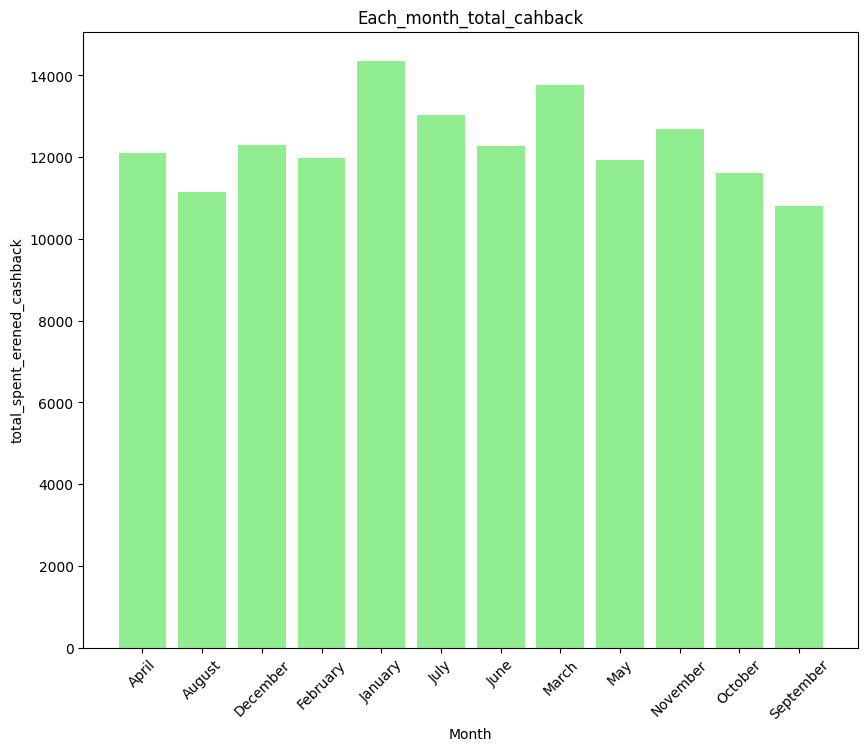

In [20]:
# 10 How much cashback or rewards were earned in each month?

query10 = " SELECT month,sum(cashback) AS total_erened_cashback FROM expenses_db.expenses GROUP BY month;"
cursor_mysql.execute(query10)
result10 = cursor_mysql.fetchall()

# Define table headers
headers = ["Month","total_spent_erened_cashback"]

# Print the result as a table
print(tabulate(result10, headers=headers, tablefmt="grid"))

# save dataframe
df10 = pd.DataFrame(result10, columns=headers)

# visualization 
plt.figure(figsize=(10,8))
plt.bar(df10["Month"],df10['total_spent_erened_cashback'],color='lightgreen')
plt.title('Each_month_total_cahback')
plt.ylabel('total_spent_erened_cashback')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.show()

+-----------+---------------------------+
| Month     |   total_amount_each_month |
+===========+===========================+
| January   |                    567490 |
+-----------+---------------------------+
| February  |                    484009 |
+-----------+---------------------------+
| March     |                    555387 |
+-----------+---------------------------+
| April     |                    506562 |
+-----------+---------------------------+
| May       |                    477774 |
+-----------+---------------------------+
| June      |                    493029 |
+-----------+---------------------------+
| July      |                    510903 |
+-----------+---------------------------+
| August    |                    486298 |
+-----------+---------------------------+
| September |                    462423 |
+-----------+---------------------------+
| October   |                    478568 |
+-----------+---------------------------+
| November  |                    4

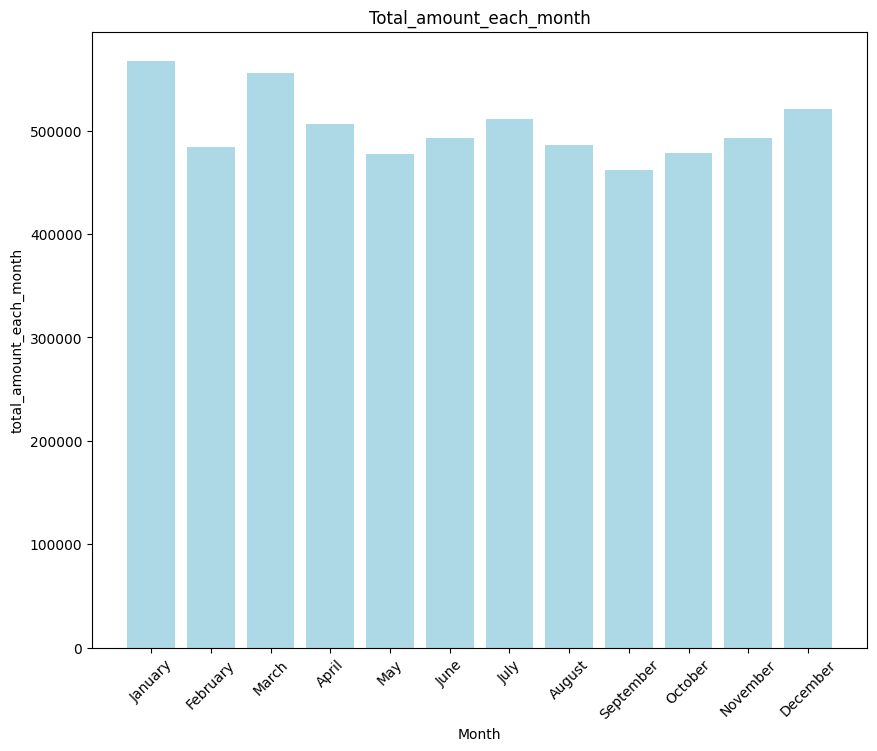

In [21]:
# 11 How has your overall spending changed over time (e.g., increasing, decreasing, remaining stable) 

query11 = " SELECT month,sum(amount_paid) AS total_amount_each_month FROM expenses_db.expenses GROUP BY month ORDER BY FIELD(month, 'January','February','March','April','May','June','July','August','September','October','November','December');"
cursor_mysql.execute(query11)
result11 = cursor_mysql.fetchall()

# Define table headers
headers = ["Month","total_amount_each_month"]

# Print the result as a table
print(tabulate(result11, headers=headers, tablefmt="grid"))

# save to dataframe
df11 = pd.DataFrame(result11, columns=headers)

# visualization 
plt.figure(figsize=(10,8))
plt.bar(df11["Month"],df11['total_amount_each_month'],color='lightblue')
plt.title('Total_amount_each_month')
plt.ylabel('total_amount_each_month')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.show()

+------------------------------------------------+--------+---------------+-------------+--------+--------+
| Travel_type                                    |   Trip |   total_spent |   avg_spent |    min |    max |
+================================================+========+===============+=============+========+========+
| Training quickly board.                        |      1 |        498.84 |      498.84 | 498.84 | 498.84 |
+------------------------------------------------+--------+---------------+-------------+--------+--------+
| Foreign report seem.                           |      1 |        498.78 |      498.78 | 498.78 | 498.78 |
+------------------------------------------------+--------+---------------+-------------+--------+--------+
| Amount mean letter role.                       |      1 |        498.05 |      498.05 | 498.05 | 498.05 |
+------------------------------------------------+--------+---------------+-------------+--------+--------+
| Course oil team guy.      

C:\Users\ankit\AppData\Local\Temp\ipykernel_14940\2155979694.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_top, x="avg_spent", y="Travel_type", palette="crest")


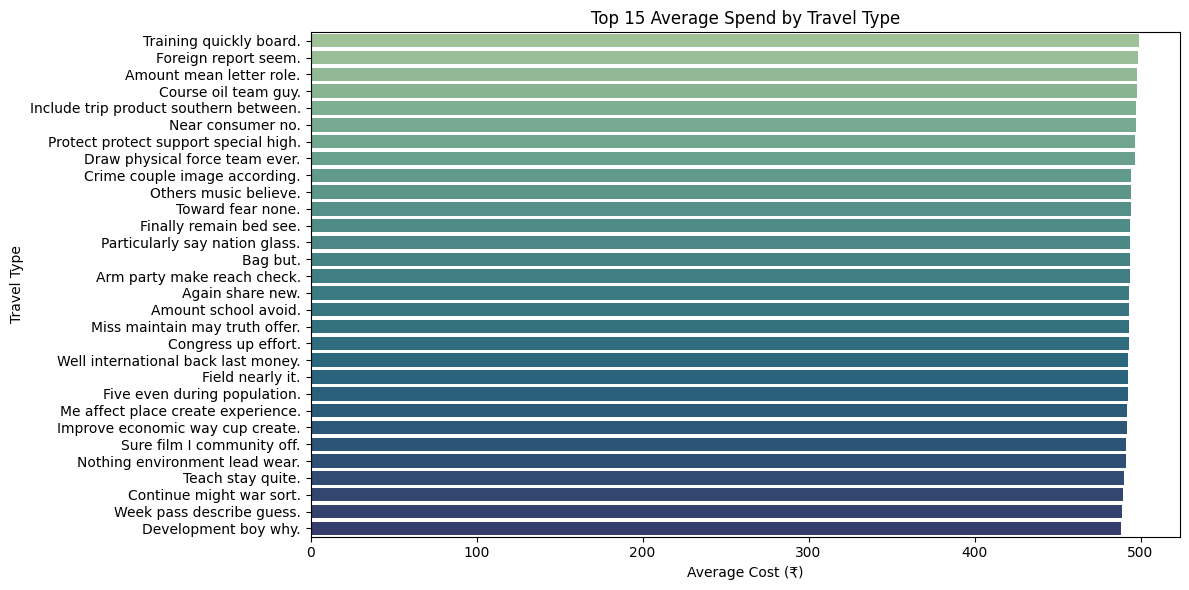

In [22]:
# 12 What are the typical costs associated with different types of travel?

query12 = " SELECT description AS travel_type,count(*) AS numbers_entries,SUM(amount_paid)AS total_spent,AVG(amount_paid) AS avg_spent, MIN(amount_paid) AS min_spent,MAX(amount_paid)AS max_spent FROM expenses_db.expenses WHERE category = 'Travel' GROUP BY  travel_type ORDER BY total_spent DESC;"
cursor_mysql.execute(query12)
result12 = cursor_mysql.fetchall()

# Define table headers
headers = ["Travel_type","Trip","total_spent","avg_spent","min","max"]

# Print the result as a table
print(tabulate(result12, headers=headers, tablefmt="grid"))

# save dataframe

df12 = pd.DataFrame(result12,columns=headers)

df_top = df12.sort_values("avg_spent", ascending=False).head(30)

plt.figure(figsize=(12, 6))
sns.barplot(data=df_top, x="avg_spent", y="Travel_type", palette="crest")
plt.title("Top 15 Average Spend by Travel Type")
plt.xlabel("Average Cost (₹)")
plt.ylabel("Travel Type")
plt.tight_layout()
plt.show()


+---------------+---------------+
| Day_of_week   |   total_spent |
+===============+===============+
| Monday        |       48319.6 |
+---------------+---------------+
| Tuesday       |       44221.6 |
+---------------+---------------+
| Wednesday     |       48256.5 |
+---------------+---------------+
| Thursday      |       50719.3 |
+---------------+---------------+
| Friday        |       58040.9 |
+---------------+---------------+
| Saturday      |       46984.2 |
+---------------+---------------+
| Sunday        |       54090.5 |
+---------------+---------------+


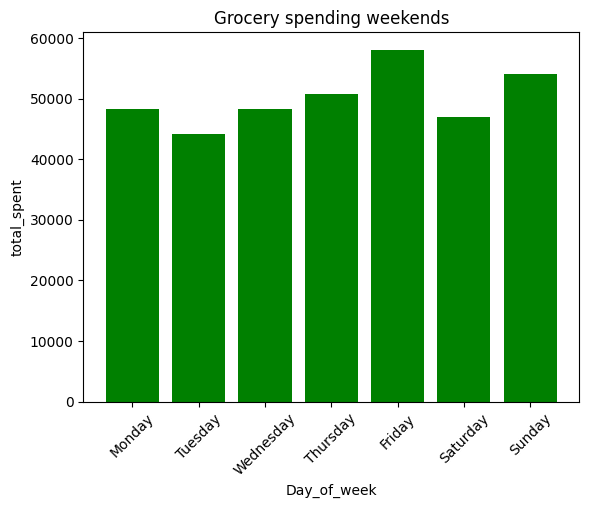

In [23]:
# 13 Are there any patterns in grocery spending (e.g., higher spending on weekends, increased spending during specific seasons)?

query13 = " SELECT DAYNAME(date) AS day_of_week,SUM(amount_paid) AS total_spent FROM expenses_db.expenses WHERE category = 'Groceries' GROUP BY day_of_week ORDER BY FIELD(day_of_week, 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday');"
cursor_mysql.execute(query13)
result13 = cursor_mysql.fetchall()

# Define table headers
headers = ["Day_of_week","total_spent"]

# Print the result as a table
print(tabulate(result13, headers=headers, tablefmt="grid"))

#save dataframe
df13 = pd.DataFrame(result13,columns=headers)

plt.Figure(figsize=(10,8))
plt.bar(df13['Day_of_week'],df13['total_spent'],color= 'green')
plt.title('Grocery spending weekends')
plt.xlabel('Day_of_week')
plt.ylabel('total_spent')
plt.xticks(rotation=45)
plt.show()

+----------------+---------------+---------------+
| category       | total_spent   | priority      |
+================+===============+===============+
| Transportation | ₹634111.68    | High Priority |
+----------------+---------------+---------------+
| Utilities      | ₹630029.00    | High Priority |
+----------------+---------------+---------------+
| Education      | ₹623099.13    | High Priority |
+----------------+---------------+---------------+
| Shopping       | ₹607070.65    | High Priority |
+----------------+---------------+---------------+
| Health         | ₹606281.49    | High Priority |
+----------------+---------------+---------------+
| Food           | ₹605698.03    | High Priority |
+----------------+---------------+---------------+
| Bills          | ₹589366.25    | High Priority |
+----------------+---------------+---------------+
| Entertainment  | ₹578457.52    | High Priority |
+----------------+---------------+---------------+
| Gifts          | ₹417531.36  

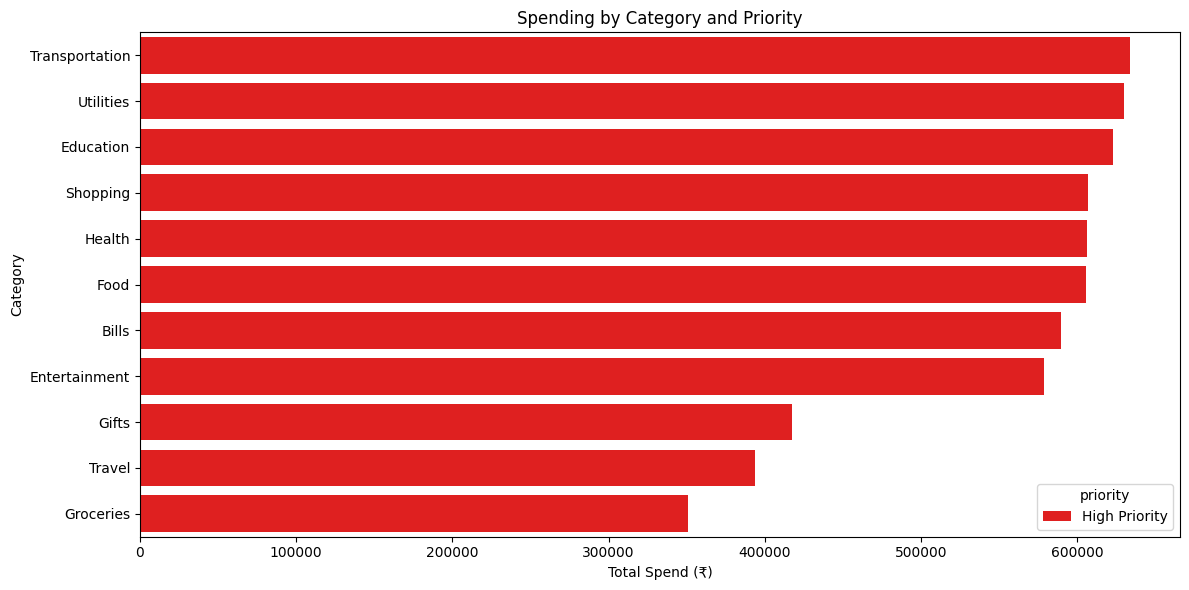

In [24]:
# 14 Define High and Low Priority Categories?

query14 = " SELECT category,sum(amount_paid) AS total_spent FROM expenses_db.expenses GROUP BY category ORDER BY total_spent DESC;"
cursor_mysql.execute(query14)
result14 = cursor_mysql.fetchall()

# Threshold for high/low priority
high_threshold = 100000

# Prepare data with priorities
table_data = []
for category, total_spent in result14:
    priority = "High Priority" if total_spent >= high_threshold else "Low Priority"
    table_data.append([category, f"₹{total_spent:.2f}", priority])


# Define table headers
headers = ["category","total_spent","priority"]

# Print the result as a table
print(tabulate(table_data, headers=headers, tablefmt="grid"))

# save dataframe 
df14 = pd.DataFrame(table_data,columns= headers)

# Convert total_spent to numeric (remove ₹ for plotting)
df14["total_spent"] = df14["total_spent"].str.replace("₹", "").str.replace(",", "").astype(float)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=df14, x="total_spent", y="category", hue="priority", palette={"High Priority": "red", "Low Priority": "green"})
plt.title("Spending by Category and Priority")
plt.xlabel("Total Spend (₹)")
plt.ylabel("Category")
plt.tight_layout()
plt.show()



+----------------+----------------+-----------------------+
| Category       |   Total Spent  |   Percentage of Total |
+================+================+=======================+
| Education      |         623099 |              10.3231  |
+----------------+----------------+-----------------------+
| Utilities      |         630029 |              10.4379  |
+----------------+----------------+-----------------------+
| Bills          |         589366 |               9.76427 |
+----------------+----------------+-----------------------+
| Shopping       |         607071 |              10.0576  |
+----------------+----------------+-----------------------+
| Transportation |         634112 |              10.5056  |
+----------------+----------------+-----------------------+
| Health         |         606281 |              10.0445  |
+----------------+----------------+-----------------------+
| Entertainment  |         578458 |               9.58354 |
+----------------+----------------+-----

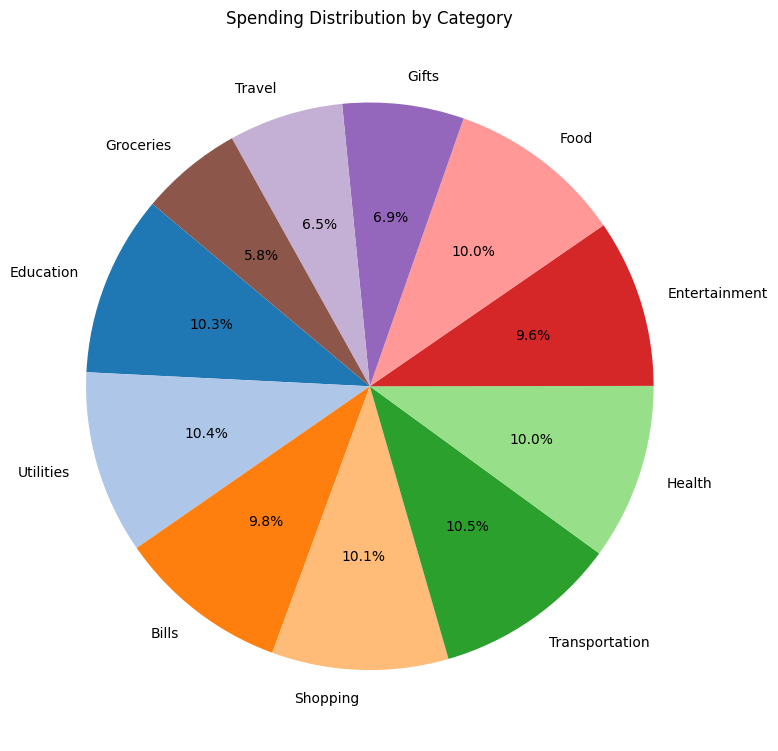

In [25]:
# 15 Which category contributes the highest percentage of the total spending?

query15 = " SELECT category,SUM(amount_paid) AS total_spent FROM expenses_db.expenses  GROUP BY category ;"
cursor_mysql.execute(query15)
result15 = cursor_mysql.fetchall()

# Calculate total spending
total_all_categories = sum(row[1] for row in result15)

# Compute percentage share for each category
category_percentages = [
    (row[0], row[1], (row[1] / total_all_categories) * 100)
    for row in result15
]


# Define table headers
headers =  ["Category", "Total Spent ", "Percentage of Total"]

# Print the result as a table
print(tabulate(category_percentages, headers=headers, tablefmt="grid"))

# Create a DataFrame
df15 = pd.DataFrame(category_percentages, columns=headers)

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    df15["Percentage of Total"],
    labels=df15["Category"],
    autopct="%1.1f%%",
    startangle=140,
    colors=plt.cm.tab20.colors  # vibrant color palette
)
plt.title("Spending Distribution by Category")
plt.tight_layout()
plt.show()

In [26]:
import sqlite3

In [27]:
Connection=sqlite3.connect("expenses_sqlite3.db")
cursor = Connection.cursor()

In [28]:

  # Select the database

cursor.execute("""
CREATE TABLE IF NOT EXISTS expenses (
    id INT AUTO_INCREMENT PRIMARY KEY,
    date DATE,
    category VARCHAR(50),
    payment_mode VARCHAR(20),
    description TEXT,
    amount_paid DECIMAL(10, 2),
    cashback DECIMAL(10, 2),
    month VARCHAR(20)
);
""")

Connection.commit()
print("Table 'expenses' created successfully in MySQL!")

Table 'expenses' created successfully in MySQL!


In [29]:
data_list = combined_df.values.tolist()

query = """
    INSERT INTO expenses(date, category, payment_mode, description, amount_paid, cashback, month)
    VALUES (?,?,?,?,?,?,?)
"""

cursor.executemany(query, data_list)
Connection.commit()
print("Data inserted using to_list()")

Data inserted using to_list()


In [ ]:
%%writefile app.Py
import streamlit as st
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from tabulate  import tabulate
import sqlite3


# title  of the app 
Connection=sqlite3.connect("expenses_sqlite3.db")
cursor = Connection.cursor()

def get_data(query):
    cursor.execute(query)
    data = cursor.fetchall()
    columns = [description[0] for description in cursor.description]
    return pd.DataFrame(data, columns=columns)


# sidebar for navigation
        
st.sidebar.title("Navigation")
page = st.sidebar.radio("Go to", ["Project Introduction", "Expenses Visualization", "SQL Queries", "Creator Info"])

# -------------------------------- PAGE 1: Introduction --------------------------------

if page == "Project Introduction":
    st.title(" Expenses Data Analysis")
    st.subheader("📊 A Streamlit App for Exploring Expendes product")
    st.write("""
    This project analyzes Expenses data from Diffrient category using an SQLite3 database.
    It provides visualizations for Automating the tracking of personal or business expenses from e-commerce platforms .
 Additionally, formulate your own 10-15 insightful queries to further explore your spending patterns.
    
    **Database Used:** `expenses_sqlite3.db`
    """)

# -------------------------------- PAGE 2: Expenses Data Visualization --------------------------------
elif page == "Expenses Visualization":
    st.title("📊 Expenses Data Visualizer")

    try:
        # Fetch the data
        df =get_data("SELECT * FROM expenses")  # <-- Replace 'expenses' with your actual table name
        st.dataframe(df)

        # Optional: Allow user to select a column for plotting
        if not df.empty:
            column = st.selectbox("Select a column to visualize", df.columns)
            st.bar_chart(df[column].value_counts())
        else:
            st.warning("No data found in the database.")

    except Exception as e:
        st.error(f"Error loading data: {e}")

  


Overwriting app.Py


In [72]:
!streamlit run app.py

^C
